# External quantum efficiency (EQE) simulation of a solar cell

In [1]:
import os, sys
try:
    import pySIMsalabim as sim
except ImportError: # add parent directory to sys.path if pySIMsalabim is not installed
    sys.path.append('..')
    import pySIMsalabim as sim
from pySIMsalabim.experiments.EQE import *

### Setup the simulation

In [2]:
# Set the path to the simulation setup file
cwd = os.path.abspath('..')
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup.txt')
session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
spectrum = os.path.join(cwd, 'SIMsalabim','Data','AM15G.txt')

# Set the simulation parameters
lambda_min = 350
lambda_max = 800
lambda_step = 10
Vext = 0
outfile_name = 'EQE.dat'

# Run the EQE simulation
ret, mess = run_EQE(simss_device_parameters, session_path, spectrum, lambda_min, lambda_max, lambda_step, Vext, outfile_name = outfile_name, JV_file_name = 'JV.dat', run_mode = False, parallel = True, force_multithreading = True, threadsafe=True)


### Plot results

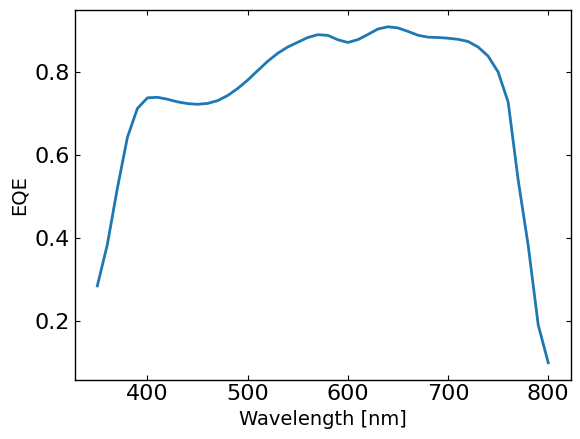

In [3]:
plt.figure()

df = pd.read_csv(os.path.join(session_path,'EQE.dat'), sep = r'\s+')
plt.plot(df['lambda']*1e9,df['EQE'])

plt.xlabel('Wavelength [nm]')
plt.ylabel('EQE')
plt.show()

In [4]:
# Clean up the output files (comment out if you want to keep the output files)
sim.clean_all_output(session_path)
sim.clean_up_output('EQE',session_path)
sim.delete_folders('tmp',session_path)